In [7]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('troop_movements.csv')
display(data)

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2024-07-11 09:33:30,1,resistance_soldier,resistance,7,7,9,6,Trandosha
1,2024-07-11 09:33:29,2,unknown,empire,8,3,4,5,Serenno
2,2024-07-11 09:33:28,3,at-st,empire,6,2,5,5,Shili
3,2024-07-11 09:33:27,4,resistance_soldier,resistance,5,4,1,4,Iktotch
4,2024-07-11 09:33:26,5,resistance_soldier,empire,10,3,4,10,Stewjon
...,...,...,...,...,...,...,...,...,...
995,2024-07-11 09:16:55,996,unknown,resistance,2,9,7,3,Iktotch
996,2024-07-11 09:16:54,997,unknown,resistance,3,6,2,8,Glee Anselm
997,2024-07-11 09:16:53,998,resistance_soldier,resistance,4,2,5,6,Rodia
998,2024-07-11 09:16:52,999,at-at,empire,8,9,10,9,Champala


In [74]:
count = data['empire_or_resistance'].value_counts().reset_index()
print(count)

  empire_or_resistance  count
0           resistance    508
1               empire    492


In [75]:
count_by_homeworld = data['homeworld'].value_counts().reset_index()
print(count_by_homeworld)

       homeworld  count
0        Troiken     30
1           Tund     30
2       Alderaan     30
3     Bestine IV     28
4      Chandrila     27
5          Cerea     27
6        Tholoth     27
7          Rodia     27
8       Dathomir     27
9        Iktotch     27
10        Mirial     27
11       Dagobah     26
12       Stewjon     26
13   Glee Anselm     26
14          Ojom     26
15      Tatooine     26
16        Umbara     26
17         Skako     25
18   Aleen Minor     25
19      Kashyyyk     25
20      Mon Cala     25
21      Toydaria     24
22         Kalee     24
23       Quermia     24
24         Shili     23
25        Ryloth     23
26      Corellia     23
27      Iridonia     23
28    Muunilinst     22
29       Socorro     22
30  Concord Dawn     22
31         Dorin     21
32         Naboo     21
33        Eriadu     20
34       Vulpter     20
35         Zolan     20
36    Haruun Kal     19
37       Sullust     18
38     Malastare     18
39      Champala     17
40     Trandosha

In [76]:
unit_type = data['unit_type'].value_counts().reset_index()
print(unit_type)

            unit_type  count
0             unknown    148
1         tie_fighter    136
2              x-wing    135
3  resistance_soldier    121
4        tie_silencer    120
5        stormtrooper    117
6               at-at    112
7               at-st    111


In [77]:
data['is_resistance'] = data['empire_or_resistance'] == 'resistance'
print("\nDataFrame after adding a new column 'is_resistance':")
print(data.head())


DataFrame after adding a new column 'is_resistance':
             timestamp  unit_id           unit_type empire_or_resistance  \
0  2024-07-11 09:33:30        1  resistance_soldier           resistance   
1  2024-07-11 09:33:29        2             unknown               empire   
2  2024-07-11 09:33:28        3               at-st               empire   
3  2024-07-11 09:33:27        4  resistance_soldier           resistance   
4  2024-07-11 09:33:26        5  resistance_soldier               empire   

   location_x  location_y  destination_x  destination_y  homeworld  \
0           7           7              9              6  Trandosha   
1           8           3              4              5    Serenno   
2           6           2              5              5      Shili   
3           5           4              1              4    Iktotch   
4          10           3              4             10    Stewjon   

   is_resistance  
0           True  
1          False  
2          

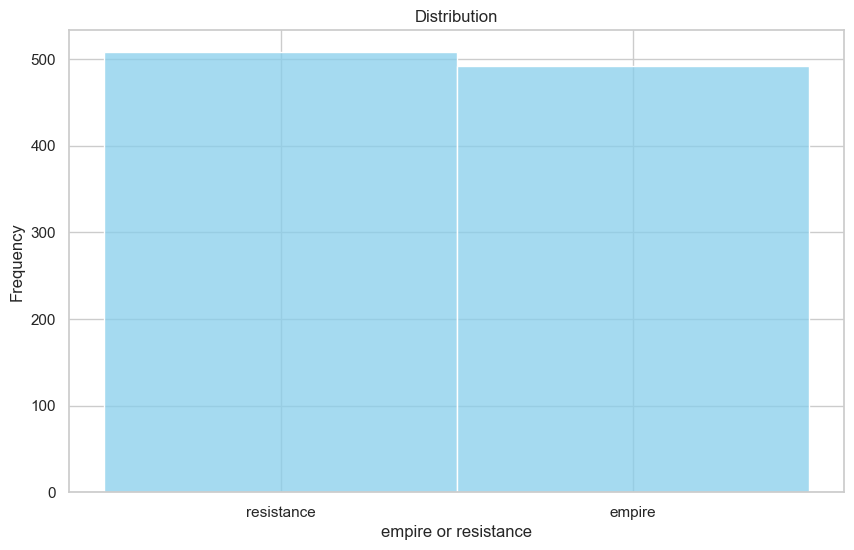

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['empire_or_resistance'], kde=False, bins=20, color='skyblue')
plt.title('Distribution')
plt.xlabel('empire or resistance')
plt.ylabel('Frequency')
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

In [40]:
# Define features (X) and target variable (y)
X = data[['homeworld', 'unit_type']]
y = data['is_resistance']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
dtree = DecisionTreeClassifier()

In [71]:
# Fit and transform the training data
X_train_encoded = pd.get_dummies(X_train)

# Transform the testing data
X_test_encoded = pd.get_dummies(X_test)

<class 'pandas.core.frame.DataFrame'>


In [48]:
dtree.fit(X_train_encoded, y_train)

DecisionTreeClassifier()

In [73]:
y_pred = dtree.predict(X_test_encoded)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.49


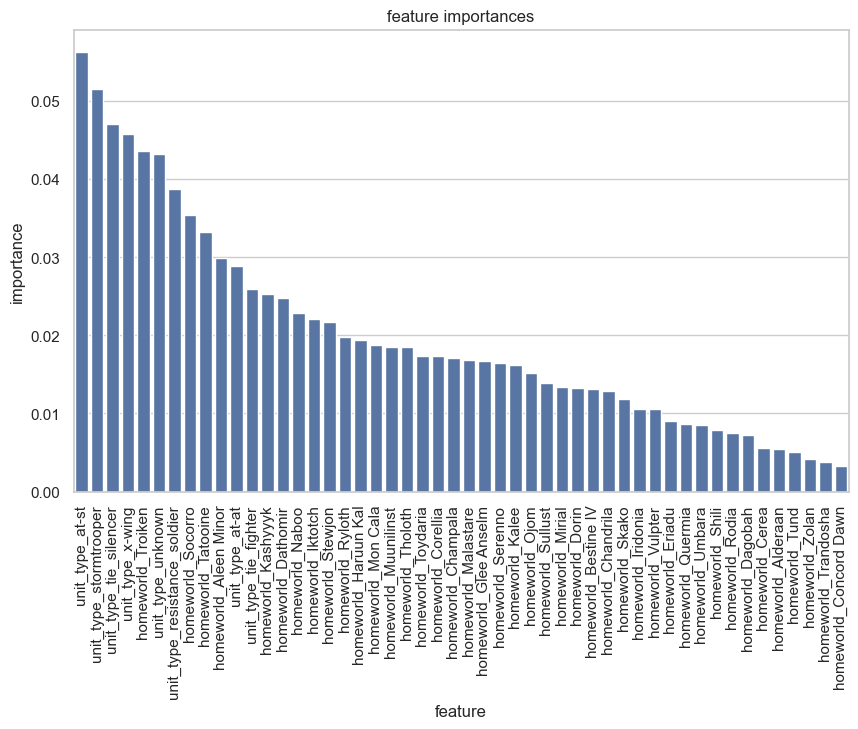

most influential unit type: unit_type_at-st


In [68]:
importances = dtree.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_train_encoded.columns, 'Importances': importances})

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Feature', y='Importances', order=feature_importances.sort_values('Importances', ascending=False).Feature)
plt.title('feature importances')
plt.xlabel('feature')
plt.ylabel('importance')
plt.xticks(rotation=90)
plt.show()

print("most influential unit type:", feature_importances.sort_values('Importances', ascending=False)['Feature'].iloc[0])

In [70]:
import pickle

# Specify the file path to save the pipeline
file_path = 'trained_model.pkl'

# Save the pipeline to disk
with open(file_path, 'wb') as file:
    pickle.dump(dtree, file)